In [19]:
import os
import utils.cop as cop
from utils.data_loader import load_data, load_file, convert_signal
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

%matplotlib widget

In [20]:
def generate_mask(signal, threshold=7):
    print('Generating Mask...')
    freq = 0.05
    seconds = 3
    window = int(seconds / freq)
    active = False
    c = 100
    count = []

    diff = signal.diff()

    for i, x in enumerate(diff):
        if i <= window:
            c += 1
            count.append(c)
            continue
        
        if x > threshold:
            active = True
            c = 0

        if active and c < window:
            c += 1
            count.append(c)
            continue 
        
        if c > window:
            active = not active

        c += 1    
        count.append(c)
        
    return np.array([True if x < window else False for x in count])

# All Recordings for the day

--------------
reading data file ./COP analysis/data/2023-06-30 OneMinTests\S155_20230629_rawDataLeft_slNa8DA2l8.txt
21 columns found
--------------
reading data file ./COP analysis/data/2023-06-30 OneMinTests\S155_20230629_rawDataRight_slNa8DA2l8.txt
21 columns found


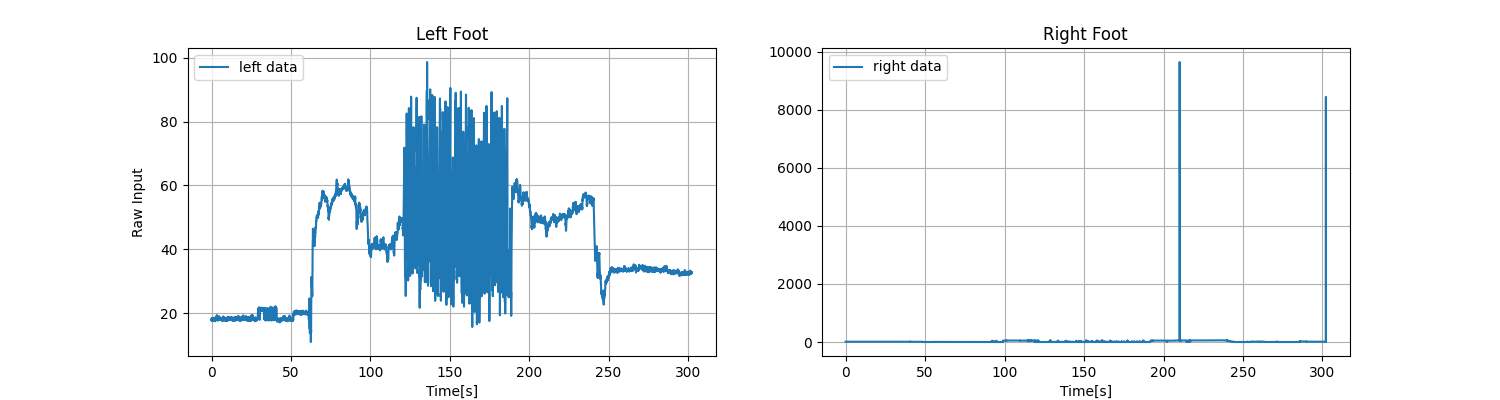

--------------
reading data file ./COP analysis/data/2023-06-30 OneMinTests\S157_20230629_rawDataLeft_slNa8DA2l8.txt
21 columns found
--------------
reading data file ./COP analysis/data/2023-06-30 OneMinTests\S157_20230629_rawDataRight_slNa8DA2l8.txt
21 columns found


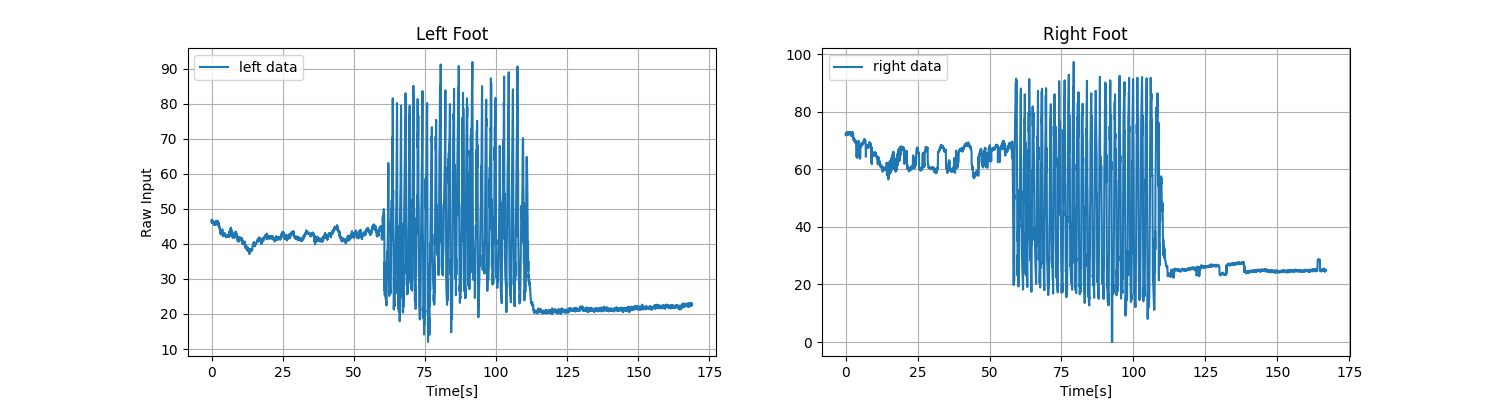

--------------
reading data file ./COP analysis/data/2023-06-30 OneMinTests\S158_20230629_rawDataLeft_slNa8DA2l8.txt
21 columns found
--------------
reading data file ./COP analysis/data/2023-06-30 OneMinTests\S158_20230629_rawDataRight_slNa8DA2l8.txt
21 columns found


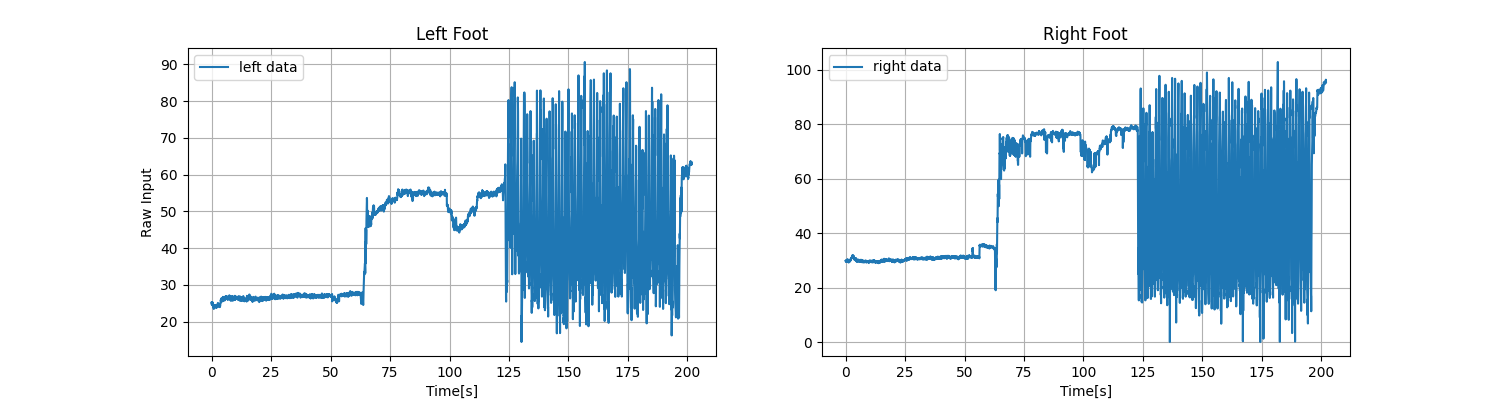

In [21]:
root_folder = './COP analysis'
root = f'{root_folder}/data/2023-06-30 OneMinTests'
file_list = []
for file in os.listdir(root):
    file_list.append(os.path.join(root, file))


for i in range(0, len(file_list) - 1, 2):
    raw_left = load_file(file_list[i])
    left_signal = convert_signal(raw_left, 'pressure')
    time_left = [x * 0.05 for x in range(len(raw_left))]
    
    raw_right = load_file(file_list[i + 1])
    right_signal = convert_signal(raw_right, 'pressure')
    time_right = [x * 0.05 for x in range(len(raw_right))]

    # ----------------------------------------------------
    plt.figure(figsize=(15,4))
    
    plt.subplot(1,2,1)
    plt.title('Left Foot')
    plt.plot(time_left, left_signal, label='left data')
    plt.ylabel('Raw Input')
    plt.xlabel('Time[s]')
    plt.grid(True)
    plt.axis('tight')
    plt.legend(loc='upper left')
    
    plt.subplot(1,2,2)
    plt.title('Right Foot')
    plt.plot(time_right, right_signal, label='right data')
    plt.xlabel('Time[s]')    
    plt.grid(True)
    plt.axis('tight')
    plt.legend(loc='upper left')

    plt.show()

In [22]:
file_set = 2 * 2

raw_left = load_file(file_list[file_set], filter=False)
left_signal = convert_signal(raw_left, 'pressure')
time_left = [x * 0.05 for x in range(len(raw_left))]

raw_right = load_file(file_list[file_set + 1], filter=False)
right_signal = convert_signal(raw_right, 'pressure')
time_right = [x * 0.05 for x in range(len(raw_right))]

filter_left = load_file(file_list[file_set], filter=True, cutoff=1.5)
left_filter_signal = convert_signal(filter_left, 'pressure')
left_acc = convert_signal(filter_left, 'acc_total')

filter_right = load_file(file_list[file_set + 1], filter=True, cutoff=1.5)
right_filter_signal = convert_signal(filter_right, 'pressure')
right_acc = convert_signal(filter_right, 'acc_total')

# data = {'left': {}, 'right': {}}
# data['left']['raw'] = load_file(file_list[file_set], filter=False)
# data['right']['filter'] = load_file(file_list[file_set], filter=True, cutoff=2.5)
# data['left']['signal'] = convert_signal(data['left']['raw'], 'pressure')



--------------
reading data file ./COP analysis/data/2023-06-30 OneMinTests\S158_20230629_rawDataLeft_slNa8DA2l8.txt
21 columns found
--------------
reading data file ./COP analysis/data/2023-06-30 OneMinTests\S158_20230629_rawDataRight_slNa8DA2l8.txt
21 columns found
--------------
reading data file ./COP analysis/data/2023-06-30 OneMinTests\S158_20230629_rawDataLeft_slNa8DA2l8.txt
21 columns found
Filtering data
--------------
reading data file ./COP analysis/data/2023-06-30 OneMinTests\S158_20230629_rawDataRight_slNa8DA2l8.txt
21 columns found
Filtering data


# Pressure Signal with Filter and Differential

Looking at the differential we can extrapolate activity. If the dynamic range of the signal is significantly larger, that means the subject is walking (`active`)

We can a threshold for the activity, represented by the dashed line on the graph

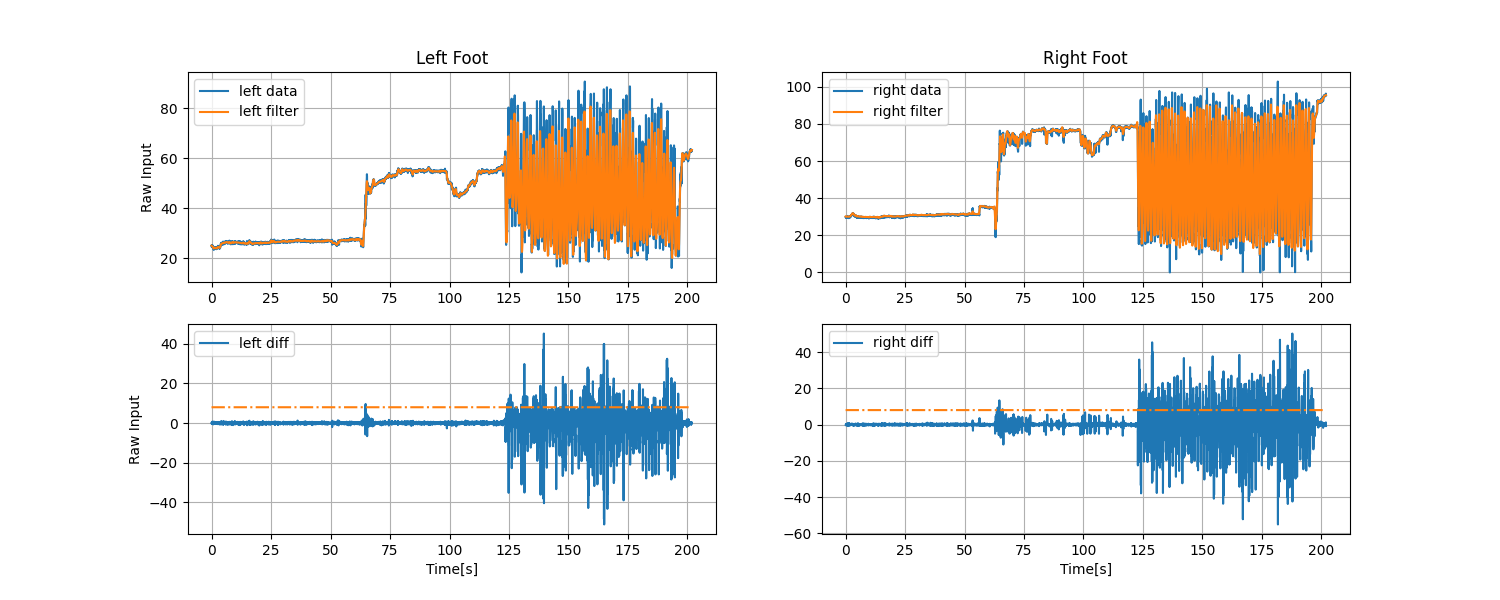

In [23]:
left_line = [8 for x in time_left]
plt.figure(figsize=(15,6))

plt.subplot(2,2,1)
plt.title('Left Foot')
plt.plot(time_left, left_signal, label='left data')
plt.plot(time_left, left_filter_signal, label='left filter')
plt.ylabel('Raw Input')
plt.grid(True)
plt.axis('tight')
plt.legend(loc='upper left')

plt.subplot(2,2,2)
plt.title('Right Foot')
plt.plot(time_right, right_signal, label='right data')
plt.plot(time_right, right_filter_signal, label='right filter')
plt.grid(True)
plt.axis('tight')
plt.legend(loc='upper left')

plt.subplot(2,2,3)
plt.plot(time_left, left_signal.diff(), label='left diff')
plt.plot(time_left, left_line, '-.')
plt.ylabel('Raw Input')
plt.xlabel('Time[s]')
plt.grid(True)
plt.axis('tight')
plt.legend(loc='upper left')

plt.subplot(2,2,4)
plt.plot(time_right, right_signal.diff(), label='right diff')
plt.plot(time_left, left_line, '-.')
plt.xlabel('Time[s]')    
plt.grid(True)
plt.axis('tight')
plt.legend(loc='upper left')


plt.show()

# Activity Detection

Picking up from the previous, we can create a mask based on the threshold we set. If the signal passes the threshold we start a counter of the activity. 

If the signal does not pass the threshold again for the duration of 2 seconds, the subject has potentially stopped walking.

Generating Mask...
Generating Mask...


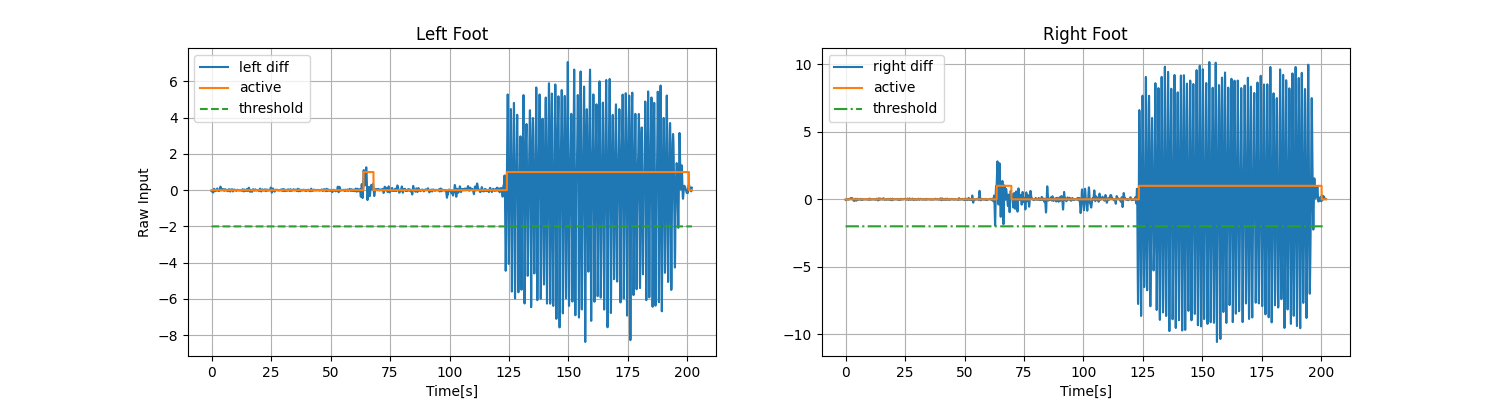

In [33]:
left_mask = generate_mask(left_filter_signal, threshold=1)

left_line = [-2 for x in time_left]
plt.figure(figsize=(15,4))

plt.subplot(1,2,1)
plt.title('Left Foot')
plt.plot(time_left, left_filter_signal.diff(), label='left diff')
plt.plot(time_left, left_mask, label='active')
plt.plot(time_left, left_line, '--', label='threshold')
plt.ylabel('Raw Input')
plt.xlabel('Time[s]')
plt.grid(True)
plt.axis('tight')
plt.legend(loc='upper left')

right_mask = generate_mask(right_filter_signal, threshold=1)
right_line = [-2 for x in time_right]

plt.subplot(1,2,2)
plt.title('Right Foot')
plt.plot(time_right, right_filter_signal.diff(), label='right diff')
plt.plot(time_right, right_mask, label='active')
plt.plot(time_right, right_line, '-.', label='threshold')
plt.xlabel('Time[s]')    
plt.grid(True)
plt.axis('tight')
plt.legend(loc='upper left')

plt.show()

# Center of Pressure

We generate two signals representing the center of pressure, one from the raw pressure signal and another from the filtered pressure signal, to draw a comparison between the signals. 


Text(0.5, 0, 'Time[s]')

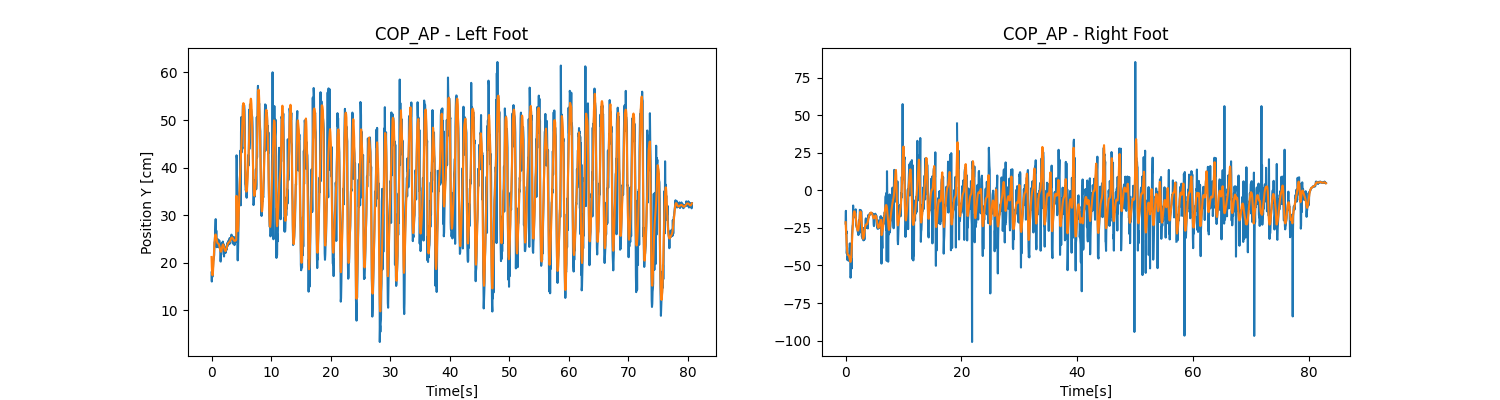

In [25]:
c = cop.CenterOfPressure([raw_left[left_mask].reset_index(), raw_right[right_mask].reset_index()])
filt_c = cop.CenterOfPressure([filter_left[left_mask].reset_index(), filter_right[right_mask].reset_index()])

left_cop = c.get_cop_foot('left')
right_cop = c.get_cop_foot('right')

filt_l_cop = filt_c.get_cop_foot('left')
filt_r_cop = filt_c.get_cop_foot('right')

left_time = [x * 0.05 for x in range(len(left_cop[0]))]
right_time = [x * 0.05 for x in range(len(right_cop[0]))]
plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
plt.title('COP_AP - Left Foot')
plt.plot(left_time, left_cop[1])
plt.plot(left_time, filt_l_cop[1])
plt.ylabel('Position Y [cm]')
plt.xlabel('Time[s]')
plt.subplot(1,2,2)
plt.title('COP_AP - Right Foot')
plt.plot(right_time, right_cop[1])
plt.plot(right_time, filt_r_cop[1])
plt.xlabel('Time[s]')

# COP Phases

We use the filtered signal to find the peaks (positive and negative) of the newly obtained cop signal.

When a heel strike is made we consider that the signal is at its lowest point of the insole (the pressure points are at the heel). 

When the toes are lifter the signal should be at the top of the insole (the pressure points are concentrated at the toes).


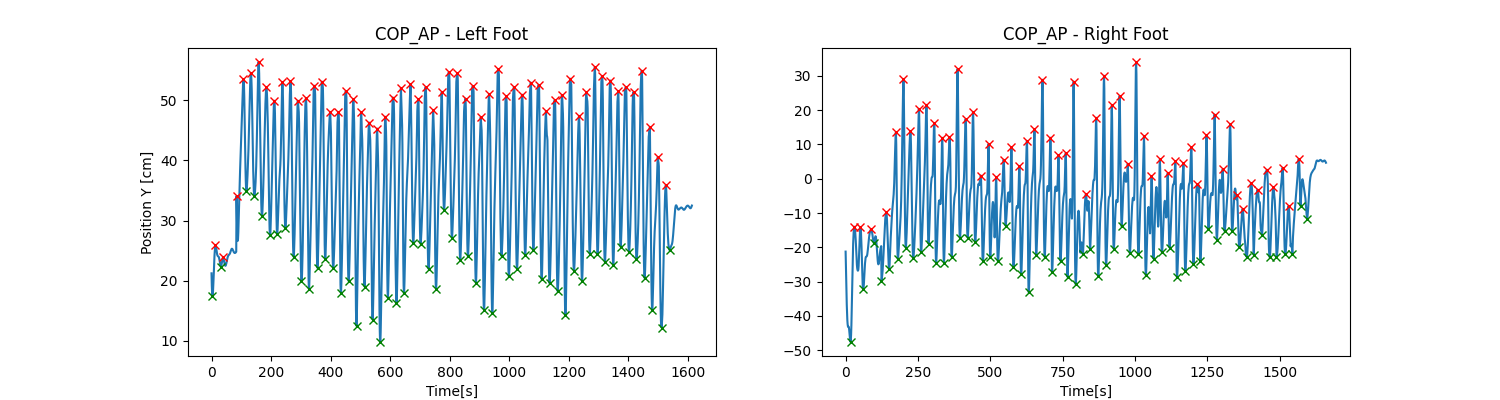

In [26]:
from scipy.signal import find_peaks

xl = filt_l_cop[1]
l_peaks_positive, _ = find_peaks(xl, prominence=1, distance=20)
l_peaks_negative, _ = find_peaks(-xl, prominence=1, distance=20)

xr = filt_r_cop[1]
r_peaks_positive, _ = find_peaks(xr, prominence=1, distance=20)
r_peaks_negative, _ = find_peaks(-xr, prominence=1, distance=20)

plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
plt.title('COP_AP - Left Foot')
plt.plot(xl)
plt.plot(l_peaks_positive, xl[l_peaks_positive], "x", color='red')
plt.plot(l_peaks_negative, xl[l_peaks_negative], "x", color='green')
plt.ylabel('Position Y [cm]')
plt.xlabel('Time[s]')
plt.subplot(1,2,2)
plt.title('COP_AP - Right Foot')
plt.plot(xr)
plt.plot(r_peaks_positive, xr[r_peaks_positive], "x", color='red')
plt.plot(r_peaks_negative, xr[r_peaks_negative], "x", color='green')
plt.xlabel('Time[s]')

plt.show()


In [27]:
def closest_peaks(positive, negative): 
    distances = []
    pairs = []
    for n in negative:
        for p in positive:
            if n < p:
                distance = p - n
                pairs.append((p, n))
                distances.append(distance*0.05)
                break
            
    return distances, pairs
            

def find_cycle_time(peaks):
    # Calculate distances between pairs of peaks
    distances = []
    for i in range(len(peaks) - 1):
        distance = np.abs(peaks[i] - peaks[i + 1])
        distances.append(distance*0.05)

    return distances

def find_cop_velocity(data, time, peaks):
    velocity_array = []
    
    for i in range(len(time)):
        p, n = peaks[i]
        velocity_array.append((data[p] - data[n]) / time[i])
        
    return velocity_array
        

# Calculations

In [28]:
l_closest, l_pairs = closest_peaks(l_peaks_positive, l_peaks_negative)
r_closest, r_pairs = closest_peaks(r_peaks_positive, r_peaks_negative)
l_velocity = find_cop_velocity(xl, l_closest, l_pairs)
r_velocity = find_cop_velocity(xr, r_closest, r_pairs)

print('Calculations: ')
print()
print('-----------------------------------')
print('LEFT')
print('Average Step Time:', '%.2f' % np.mean(l_closest), '[sec]')
print('Average Cycle Time ', '%.2f' % np.mean(find_cycle_time(l_peaks_positive)),'[sec]')
print('Average COP Velocity: ', '%.2f' % np.mean(l_velocity), '[mm/s]')
print('COP Variability:', '%.2f' % np.std(filt_l_cop))
print()
print('-----------------------------------')
print('RIGHT')
print('Average Step Time:', '%.2f' % np.mean(r_closest), '[sec]')
print('Average Cycle Time', '%.2f' % np.mean(find_cycle_time(r_peaks_positive)), '[sec]')
print('Average COP Velocity: ', '%.2f' % np.mean(r_velocity), '[mm/s]')
print('COP Variability:', '%.2f' % np.std(filt_r_cop))


Calculations: 

-----------------------------------
LEFT
Average Step Time: 0.81 [sec]
Average Cycle Time  1.35 [sec]
Average COP Velocity:  34.54 [mm/s]
COP Variability: 91.29

-----------------------------------
RIGHT
Average Step Time: 0.98 [sec]
Average Cycle Time 1.40 [sec]
Average COP Velocity:  33.21 [mm/s]
COP Variability: 74.78


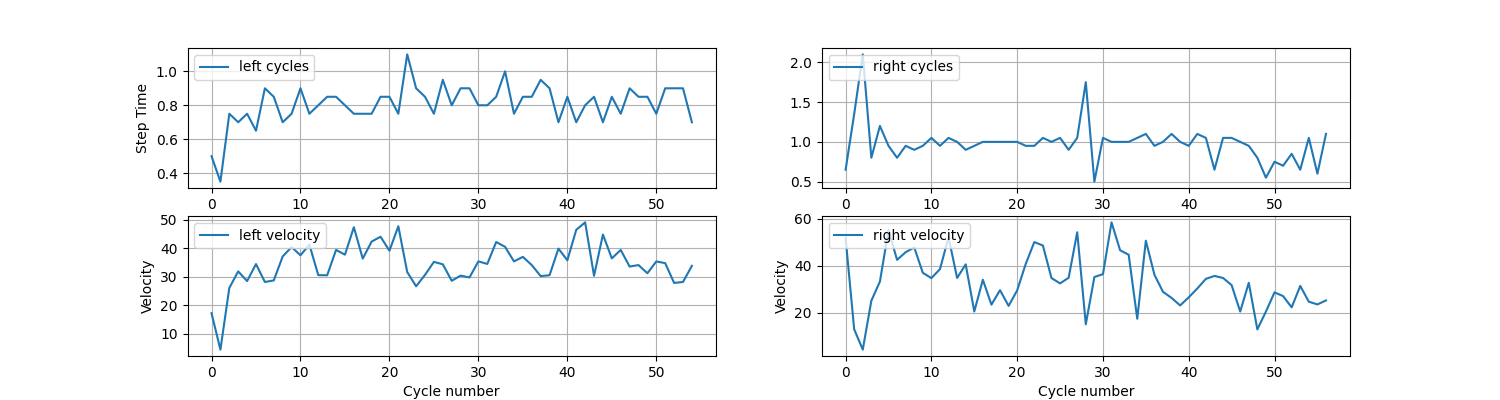

In [29]:
plt.figure(figsize=(15,4))

plt.subplot(2,2,1)
plt.plot(l_closest, label='left cycles')
plt.ylabel('Step Time')
plt.xlabel('Cycle number')
plt.grid(True)
plt.axis('tight')
plt.legend(loc='upper left')

plt.subplot(2,2,2)
plt.plot(r_closest, label='right cycles')
plt.xlabel('Step number')
plt.grid(True)
plt.axis('tight')
plt.legend(loc='upper left')

plt.subplot(2,2,3)
plt.plot(l_velocity, label='left velocity')
plt.ylabel('Velocity')
plt.xlabel('Cycle number')
plt.grid(True)
plt.axis('tight')
plt.legend(loc='upper left')

plt.subplot(2,2,4)
plt.plot(r_velocity, label='right velocity')
plt.ylabel('Velocity')
plt.xlabel('Cycle number')
plt.grid(True)
plt.axis('tight')
plt.legend(loc='upper left')

plt.show()

# Velocity Calculations from Acceleration

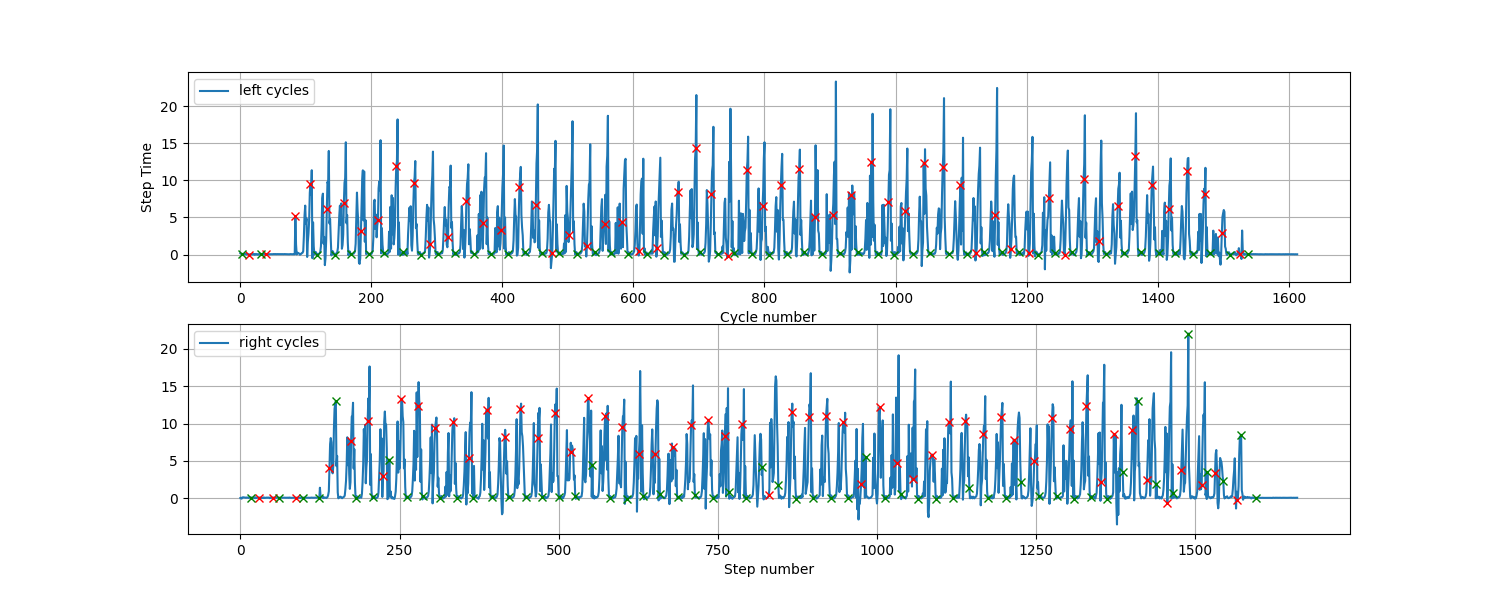

In [30]:
l_acc_masked = left_acc[left_mask].reset_index().iloc[:,1]
r_acc_masked = right_acc[right_mask].reset_index().iloc[:,1]

plt.figure(figsize=(15,6))
plt.subplot(2,1,1)
plt.plot(left_acc[left_mask].reset_index().iloc[:,1], label='left cycles')
plt.plot(l_peaks_positive, l_acc_masked[l_peaks_positive], "x", color='red')
plt.plot(l_peaks_negative, l_acc_masked[l_peaks_negative], "x", color='green')
plt.ylabel('Step Time')
plt.xlabel('Cycle number')
plt.grid(True)
plt.axis('tight')
plt.legend(loc='upper left')

plt.subplot(2,1,2)
plt.plot(r_acc_masked, label='right cycles')
plt.plot(r_peaks_positive, r_acc_masked[r_peaks_positive], "x", color='red')
plt.plot(r_peaks_negative, r_acc_masked[r_peaks_negative], "x", color='green')
plt.xlabel('Step number')
plt.grid(True)
plt.axis('tight')
plt.legend(loc='upper left')


In [31]:
left_acc[left_mask].reset_index().iloc[:,1]


0       0.182176
1       0.133425
2       0.073524
3       0.097048
4       0.088534
          ...   
1609    0.028040
1610    0.046090
1611    0.033381
1612    0.039556
1613    0.035106
Name: 0, Length: 1614, dtype: float64

# Sensor Details

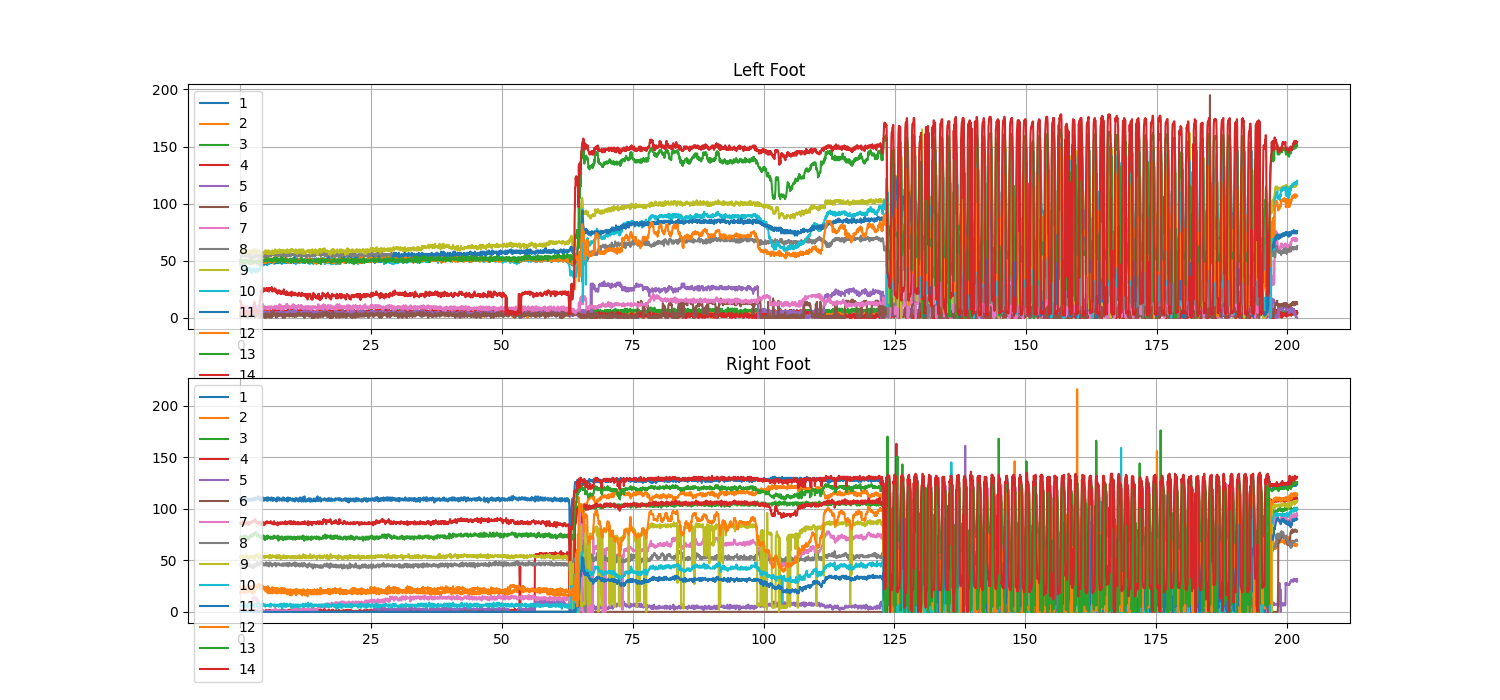

In [32]:
d = raw_left[['raw_1', 'raw_2', 'raw_3', 'raw_4', 'raw_5', 'raw_6',
                'raw_7', 'raw_8', 'raw_9', 'raw_10', 'raw_11', 'raw_12',
                'raw_13', 'raw_14']]

plt.figure(figsize=(15,7))
plt.subplot(2,1,1)
for col in d.columns:
    plt.plot(time_left, d[col], label=col.split('_')[1])
    
plt.grid(True)
plt.axis('tight')
plt.legend(loc='upper left')
plt.title('Left Foot')

d = raw_right[['raw_1', 'raw_2', 'raw_3', 'raw_4', 'raw_5', 'raw_6',
                'raw_7', 'raw_8', 'raw_9', 'raw_10', 'raw_11', 'raw_12',
                'raw_13', 'raw_14']]

plt.subplot(2,1,2)
for col in d.columns:
    plt.plot(time_right, d[col], label=col.split('_')[1])
    
plt.grid(True)
plt.axis('tight')
plt.legend(loc='upper left')
plt.title('Right Foot')

plt.show()
